In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()                                    ### !!!!!!!!!! I THINK THESE LINES OF CODE ARE IN THE APPRIORIATE SPOTS!!!!!!!!!!!!


# reflect the tables
Base.prepare(autoload_with=engine)    # This is telling the "connection" to prepare the data and "autoload" the the data from the database using the "engine"

In [6]:
# View all of the classes that automap found
Base.classes.keys()                                  #===============> COULDNT I ALSO USE THE "inspector" technique to grab this data?????????????????????


['measurement', 'station']

In [7]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################

# View all of the classes that automap found

In [8]:
# Save references to each table ==> "Save as variable"

# Measurement Reference
Measurement = Base.classes.measurement

# Station Reference
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Displaying Columns (data) from Measurement from "hawaii.sqlite" database
Measurement_hawaii_columns = session.query(Measurement).first()
Measurement_hawaii_columns.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2b228b3d900>,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [11]:
# Displaying Columns (data) from Station from "hawaii.sqlite" database
Station_hawaii_columns =  session.query(Station).first()
Station_hawaii_columns.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2b228b3edd0>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

In [12]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

In [26]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################


# Find the most recent date in the data set.


Text(0, 0.5, 'Inches')

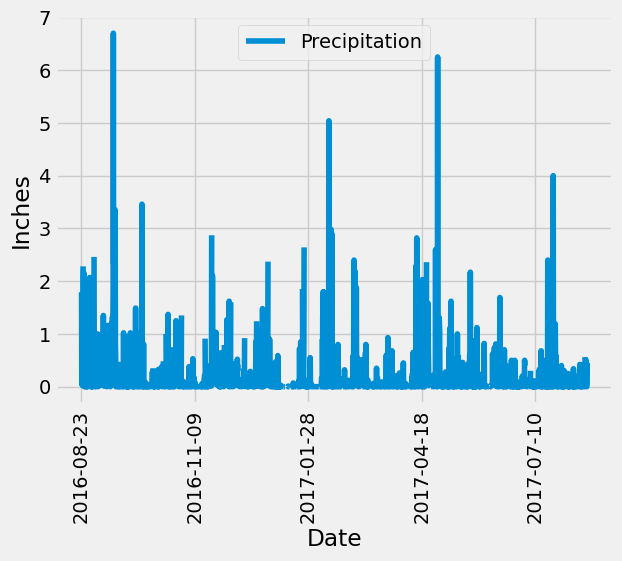

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database

# # Calculate the date one year from the last date in data set.

one_calendar_year_data = dt.date(2017, 8, 23) - dt.timedelta(days=365)


# ####------------------------------------------------------------------------------------------------####
# # # CODE THAT SHOWS ALL DATES IN THE LAST YEAR ==> JUST HAVE FOR REFERENCE WHILE WRITING CODE
# # for days in one_calendar_year_data:
# #     print(days)
# ####------------------------------------------------------------------------------------------------####

# Perform a query to retrieve the data and precipitation scores
data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_calendar_year_data).all()

# ####------------------------------------------------------------------------------------------------####
# # CODE THAT SHOWS ALL DATA FOR "dates" and "prcp" IN THE LAST YEAR FROM MOST RECENT DATE IN THE DATABASE
# for data2 in data:
#     print(data2)
# ####------------------------------------------------------------------------------------------------####

# Save the query results as a Pandas DataFrame. Explicitly set the column names

hawaii_dates_prcp_data_df = pd.DataFrame(data, columns= ['Date', 'Precipitation'])

# Sort the dataframe by date
hawaii_dates_prcp_data_df = hawaii_dates_prcp_data_df.sort_values('Date').reset_index(drop=True)    

hawaii_dates_prcp_data_df
# Use Pandas Plotting with Matplotlib to plot the data
x_axis = hawaii_dates_prcp_data_df['Date']
y_axis = hawaii_dates_prcp_data_df['Precipitation']


#Creating the plot w/ labels
hawaii_dates_prcp_data_df.plot(x='Date', y='Precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


Text(0, 0.5, 'Inches')

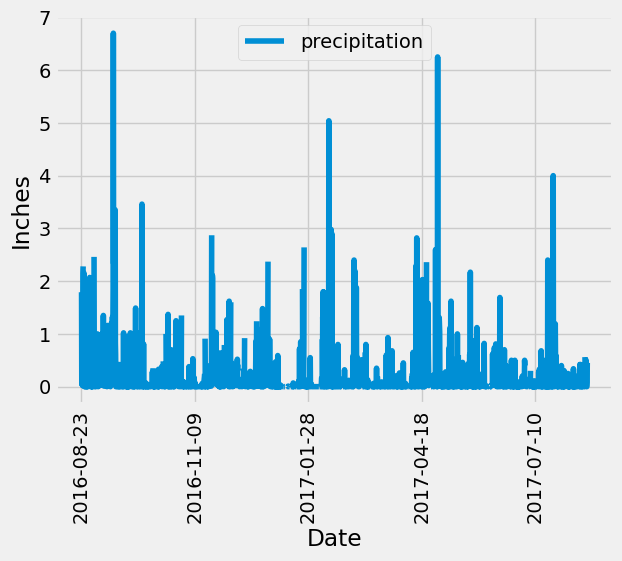

In [10]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [15]:
# Use Pandas to calculate the summary statistics for the precipitation data

hawaii_dates_prcp_data_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset

total_stations = session.query(func.count(Station.id)).all()
print(total_stations)

[(9,)]


In [12]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################


# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [121]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


# FROM "Measurement" table ==> Selecting the station column and COUNT of "station" in that table ==> Grouping By "stations" and then Order By (sorting) the counts of each of the 9 stations in descending order
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for stations in station_activity:     ## for loop to print out "most active stations" results from the query above in the cell
    print(stations)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [13]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################


# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [77]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

most_active_station_temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(most_active_station_temp_stats)


[(54.0, 85.0, 71.66378066378067)]


In [14]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################

# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

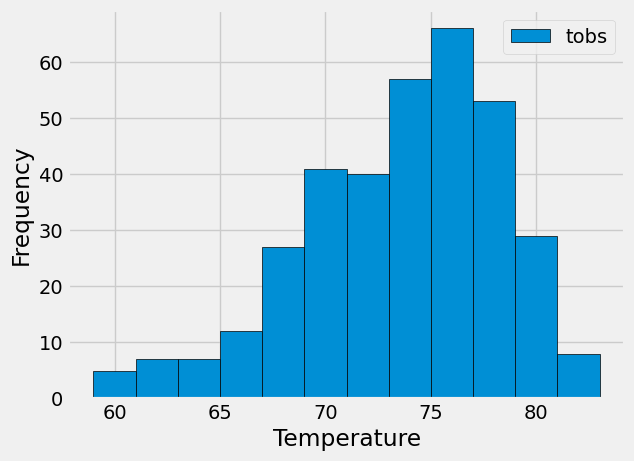

In [132]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# WRITE IN A COMMENT HERE
top_station_last_year_temp = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_calendar_year_data, Measurement.station == 'USC00519281').all()

# Coverting results from query "station_temp DataFrame
top_station_last_year_temp = pd.DataFrame(station_temp_query, columns=['Temperature'])

# Ploting the histogram w/ x & y-axis labels
plt.hist(top_station_last_year_temp['Temperature'], bins= 12, edgecolor='black')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)  # Adding in gridlines for better readability
plt.legend(['tobs']) # Adding in legend 

# Display the histogram
plt.show()


Text(0.5, 4.183333333333314, 'Temperature')

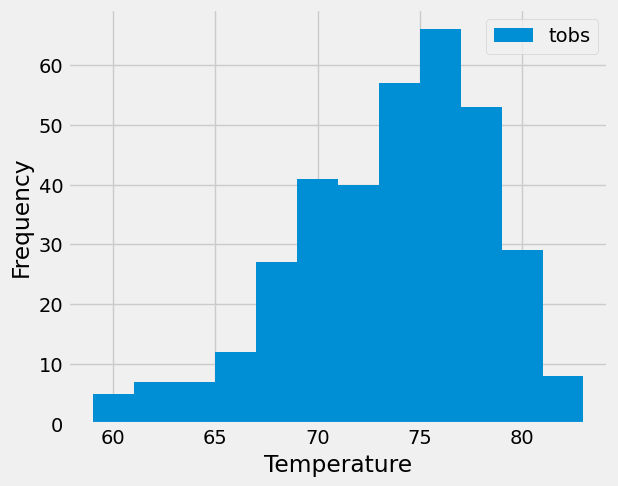

In [15]:
###!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!  REFERENCE  !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!! ###################


# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()